# **Data Analysis of Italian Serie A 2020-2021 dataset**
The aim of this analysis is to present and study the data of all the players from last season at the end of the preparation for Fantasy Football 22/23.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/italian-serie-a-20202021-player-stats-gazzetta/serie_a_italy_2021.csv


In [2]:
#importo il dataset e ottengo le informazioni su di esso
data = pd.read_csv('../input/italian-serie-a-20202021-player-stats-gazzetta/serie_a_italy_2021.csv')
data.dtypes


club                   object
name                   object
position               object
cost                    int64
matches_played        float64
goals                 float64
assists               float64
yellow_cards          float64
red_cards             float64
penalty_attempted     float64
penalty_scored        float64
penalty_saved         float64
avg_rating            float64
magic_avg_rating      float64
magic_total_points    float64
dtype: object

In [3]:
#ottengo alcune informazioni statistiche sul dataset
data.describe()

,cost,matches_played,goals,assists,yellow_cards,red_cards,penalty_attempted,penalty_scored,penalty_saved,avg_rating,magic_avg_rating,magic_total_points
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,12.424188,18.711191,2.025271,1.185921,2.750903,0.119134,0.270758,0.229242,0.041516,5.453718,5.578430,4.603069
std,8.276125,11.731920,3.725589,1.916829,2.745249,0.335207,1.182594,1.015153,0.282219,1.593464,1.787351,16.735451
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.500000
25%,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.660000,5.530000,-0.600000
50%,11.000000,20.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.880000,5.935000,1.000000
75%,17.000000,29.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.050000,6.370000,8.525000
max,47.000000,38.000000,29.000000,11.000000,14.000000,2.000000,13.000000,11.000000,4.000000,7.000000,8.980000,81.500000


## Analisi delle squadre
In questa prima parte del notebook viene fatta un'analisi incentrata sulle squadre nel loro complesso, non sui singoli giocatori

In [4]:
# Ordino il dataset in base alla squadra e aggiungo delle features derivate
data.sort_values('club')
data['goals_per_match'] = (data['goals'] / data['matches_played']).astype(float)
data['goals_without_penalty'] = (data['goals'] - data['penalty_scored']).astype(float)
data['assist_per_match'] = (data['assists'] / data['matches_played']).astype(float)
data['fantapunti_per_credito'] = (data['magic_total_points'] / data['cost']).astype(float)
data

,club,name,position,cost,matches_played,goals,assists,yellow_cards,red_cards,penalty_attempted,penalty_scored,penalty_saved,avg_rating,magic_avg_rating,magic_total_points,goals_per_match,goals_without_penalty,assist_per_match,fantapunti_per_credito
0,inter,Skriniar M.,DF,20,32.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,6.28,6.68,12.8,0.093750,3.0,0.000000,0.640000
1,torino,Bremer G.,DF,21,33.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,6.21,6.86,21.5,0.151515,5.0,0.000000,1.023810
2,genoa,Caso G.,T,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.50,6.50,0.0,0.000000,0.0,0.000000,0.000000
3,verona,Cetin M.,DF,4,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.75,5.66,-0.5,0.000000,0.0,0.000000,-0.125000
4,cagliari,Tramoni M.,MF,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75,5.75,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,lazio,Milinkovic S.,MF,32,32.0,8.0,8.0,4.0,0.0,0.0,0.0,0.0,6.35,7.54,38.1,0.250000,8.0,0.250000,1.190625
550,benevento,Lucatelli I.,GK,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,NaN,0.0,NaN,0.000000
551,lazio,Akpa Akpro J.,MF,5,25.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,5.66,5.52,-3.5,0.000000,0.0,0.040000,-0.700000
552,milan,Donnarumma A.,GK,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,NaN,0.0,NaN,0.000000


<AxesSubplot:ylabel='assists'>

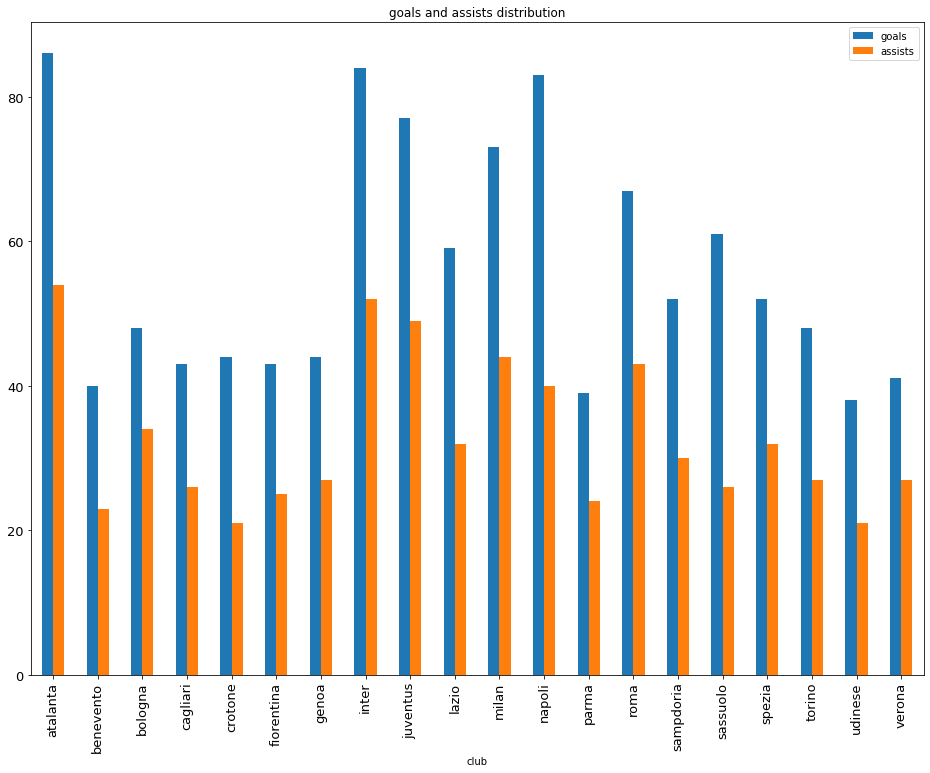

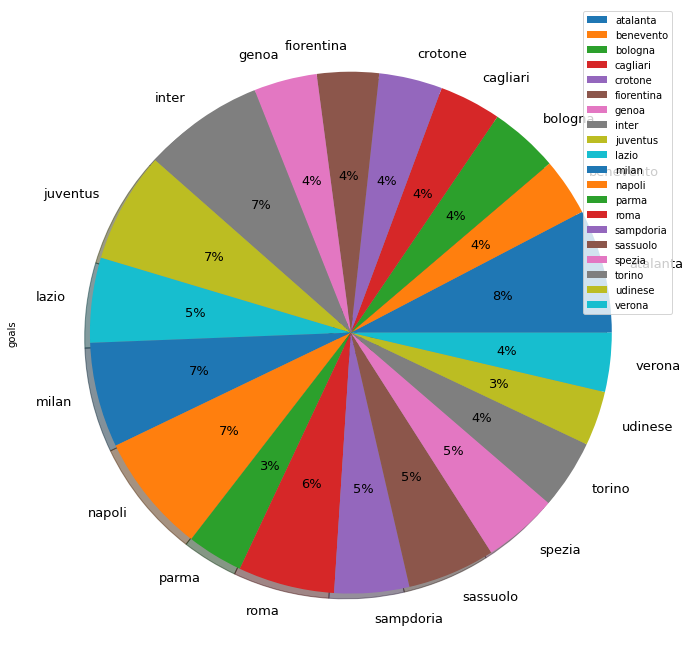

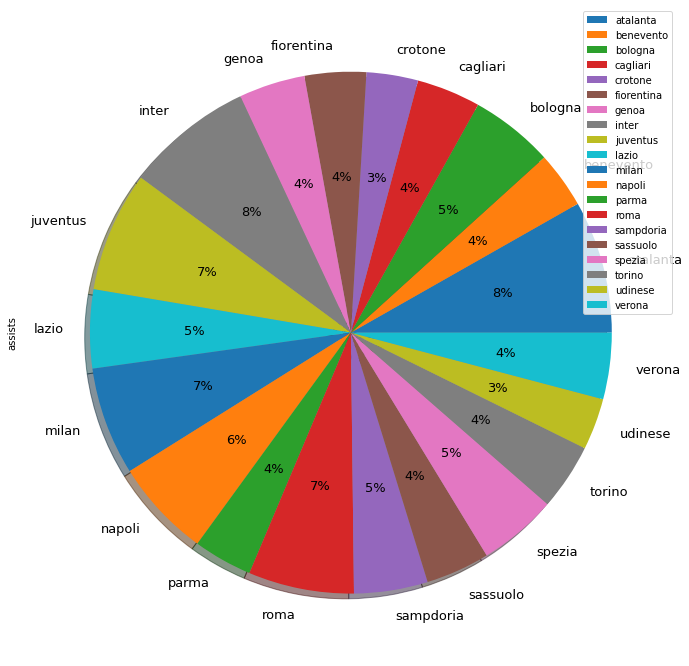

In [5]:
#analisi squadre con più goals o più assist
data_goals = data[['club','goals','assists']]
data_goals.set_index('club')
clubs = data_goals.groupby('club').sum()
clubs = pd.DataFrame(clubs)
clubs.plot(kind='bar',title='goals and assists distribution', y=['goals','assists'], figsize=(16,12), fontsize=13)

clubs.plot(kind='pie', y='goals', autopct='%1.f%%', figsize=(16,12), fontsize=13, shadow=True)
clubs.plot(kind='pie', y='assists', autopct='%1.f%%', figsize=(16,12), fontsize=13, shadow=True)



Dai grafici precedenti è possibile dedurre che la maggior parte dei goals e degli assist deriva da giocatori appartenenti ad una big. Nonostante questo, escluse Juventus, Inter, Milan e Napoli, le altre squadre non hanno grandi differenze; ciò porta ad una conclusione interessante, a livello di squadra, i giocatori di squadre come Sassuolo o Fioentina non si discostano molto dai giocatori di squadre come la Lazio.
Ciò consente di rimarcare ancora una volt che giocatori di squadre "secondarie" possono essere comunque determinanti per il Fantacalcio.

<AxesSubplot:ylabel='penalty_attempted'>

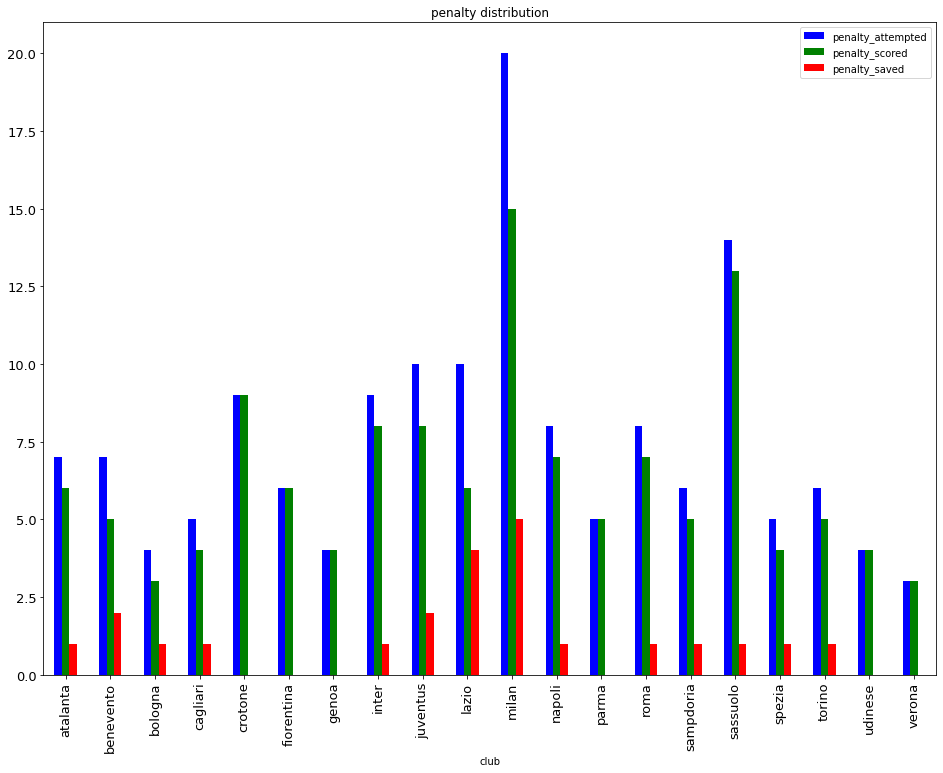

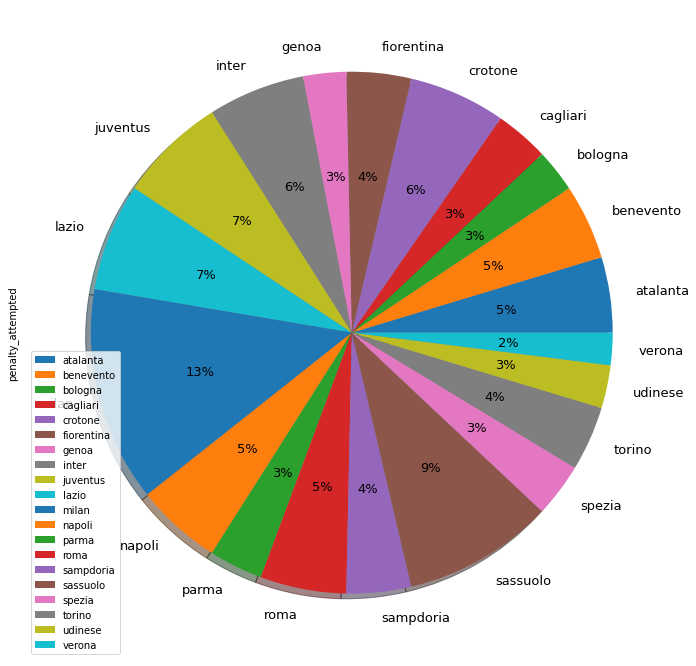

In [6]:
#Analisi rigori concessi, subiti e parati a livello di squadra
data_penalty = data[['club','penalty_attempted','penalty_scored','penalty_saved']]
data_penalty.set_index('club')
clubs = data_penalty.groupby('club').sum()
clubs = pd.DataFrame(clubs)
clubs.plot(kind='bar',title='penalty distribution', y=['penalty_attempted','penalty_scored','penalty_saved'],color=['blue','green','red'], figsize=(16,12), fontsize=13)

clubs.plot(kind='pie', y='penalty_attempted', autopct='%1.f%%', figsize=(16,12), fontsize=13, shadow=True)




Grazie a questa analisi si può notare che la distribuzione dei rigori concessi è abbastanza uniforme, ad eccezione di Milan e Sassuolo che hanno avuto un valore ben oltre la media in questa stagione. 
A livello di rigori, quindi, un rigorista di una squadra "secondaria" dovrebbe ottenere bonus simili ad un rigorista di una big.

<AxesSubplot:ylabel='yellow_cards'>

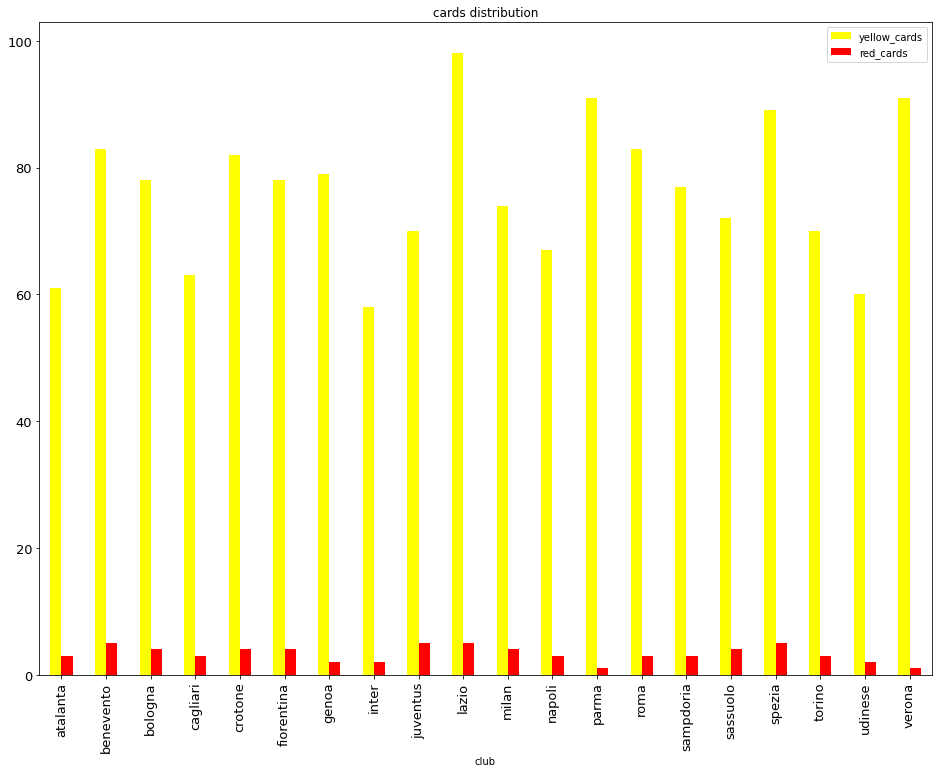

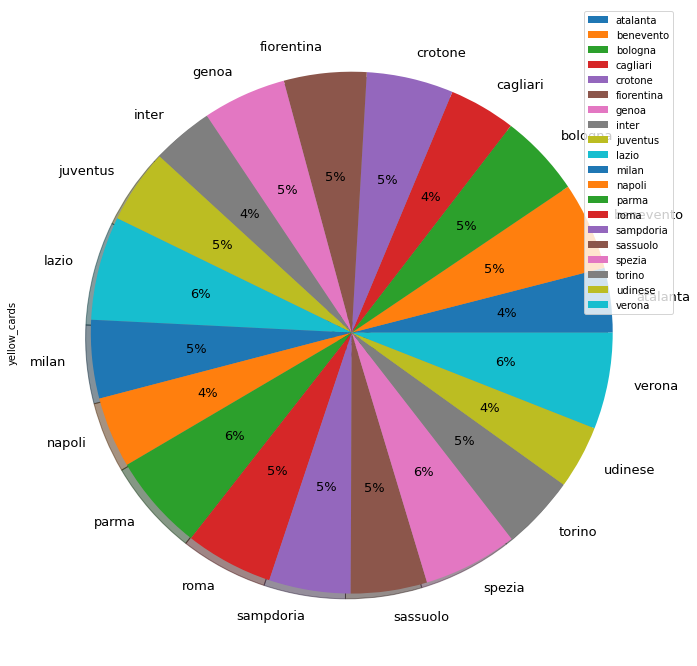

In [7]:
#Analisi ammonizioni ed espulsioni
data_cards = data[['club','yellow_cards','red_cards']]
data_cards.set_index('club')
clubs = data_cards.groupby('club').sum()
clubs = pd.DataFrame(clubs)
clubs.plot(kind='bar',title='cards distribution', y=['yellow_cards','red_cards'],color=['yellow','red'], figsize=(16,12), fontsize=13)

clubs.plot(kind='pie', y='yellow_cards', autopct='%1.f%%', figsize=(16,12), fontsize=13, shadow=True)



Per quanto riguarda ammonizioni ed espulsioni, in ottica di modificatore fairplay, la distribuzione è pressochè uniforme. Da questo punto di vista, quindi, non abbiamo differenze, nemmeno leggere fra big e squadre secondarie.

<AxesSubplot:title={'center':'media e fantamedia distribution'}, xlabel='club'>

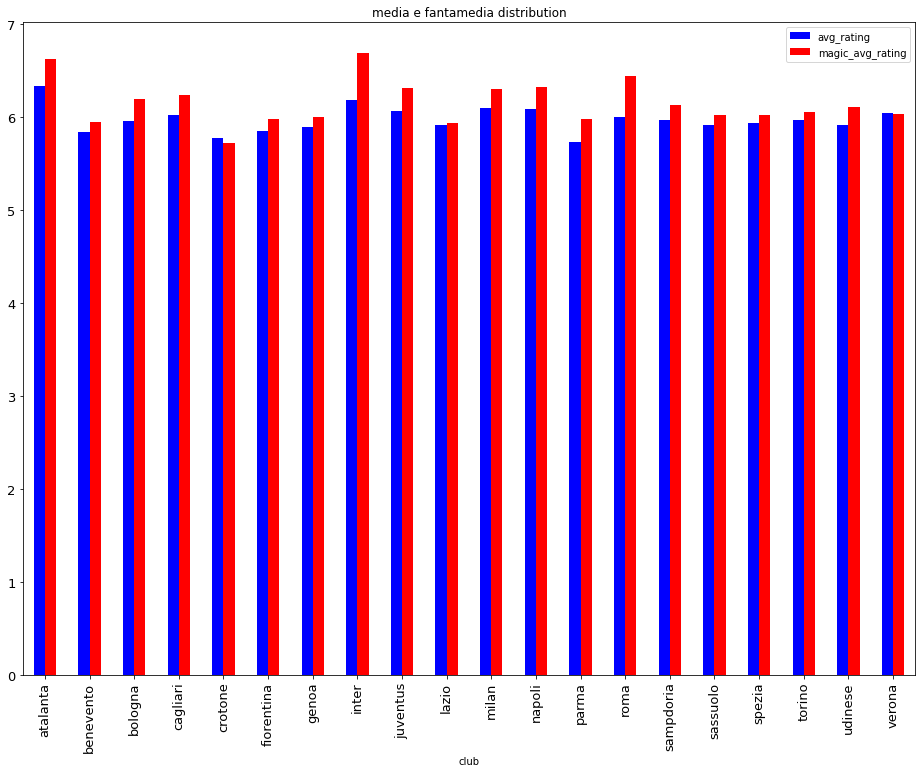

In [8]:
#Analisi media e fantamedia
data_mediavoto = data[['club','avg_rating','magic_avg_rating','matches_played']]
data_mediavoto.set_index('club')
data_mediavoto = data_mediavoto[data_mediavoto['matches_played']>20]
clubs = data_mediavoto.groupby('club').median()
clubs = pd.DataFrame(clubs)
clubs.plot(kind='bar',title='media e fantamedia distribution', y=['avg_rating','magic_avg_rating'],color=['blue','red'], figsize=(16,12), fontsize=13)





In questo tipo di analisi possiamo notare che la differenza fra le big e le squadre secondarie inizia a farsi notare di più. Infatti, fra una squadra di metà classifica, per esempio il Sassuolo, e una squadra di alta classifica,per esempio l'Inter, la differenza sulla fantamedia è abbastanza marcata: mezzo voto o più di fantamedia comincia ad essere rilevante ai fini di risultati fantacalcistici.

## Analisi giocatori
Passiamo ora ad una fase di analisi sui singoli giocatori, sicuramente più interessante ai fini della creazione della rosa al fantacalcio.
E' importante però notare che i risultati dell'analisi precedente basata sulle squadre sono utili al fine della formulazione di una strategia vincente, infatti, non è necessario scartare a priori giocatori di squadre secondarie, in quanto essi possono essere comunque fondamentali per la vittoria finale, dato che in media i loro valori non si discostano di molto da quelli dei giocatori delle squadre top.

<AxesSubplot:title={'center':'fantamedia'}, xlabel='cost', ylabel='magic_avg_rating'>

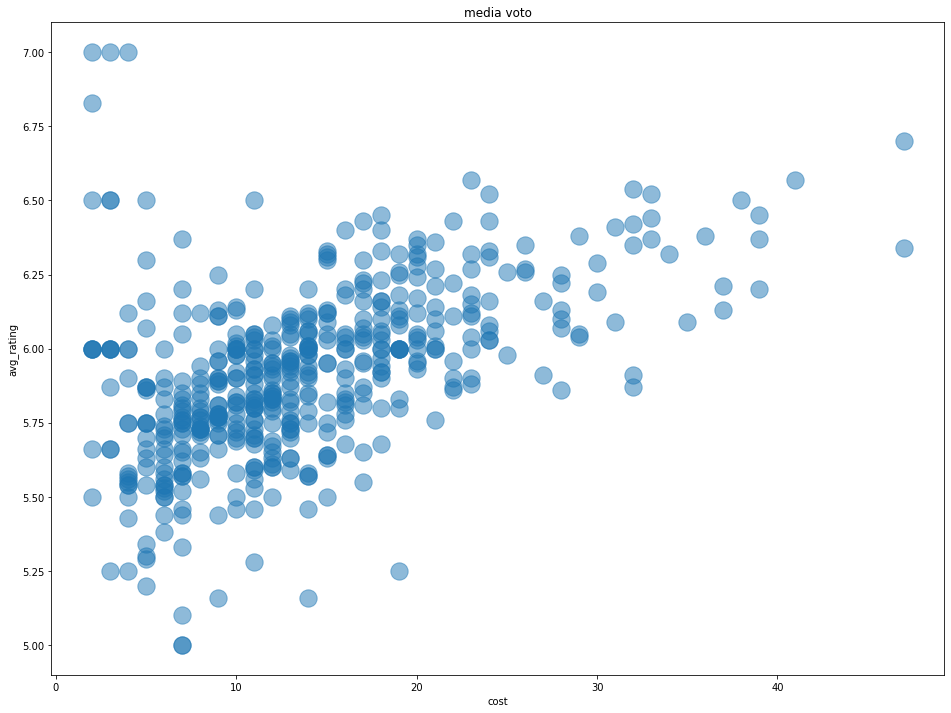

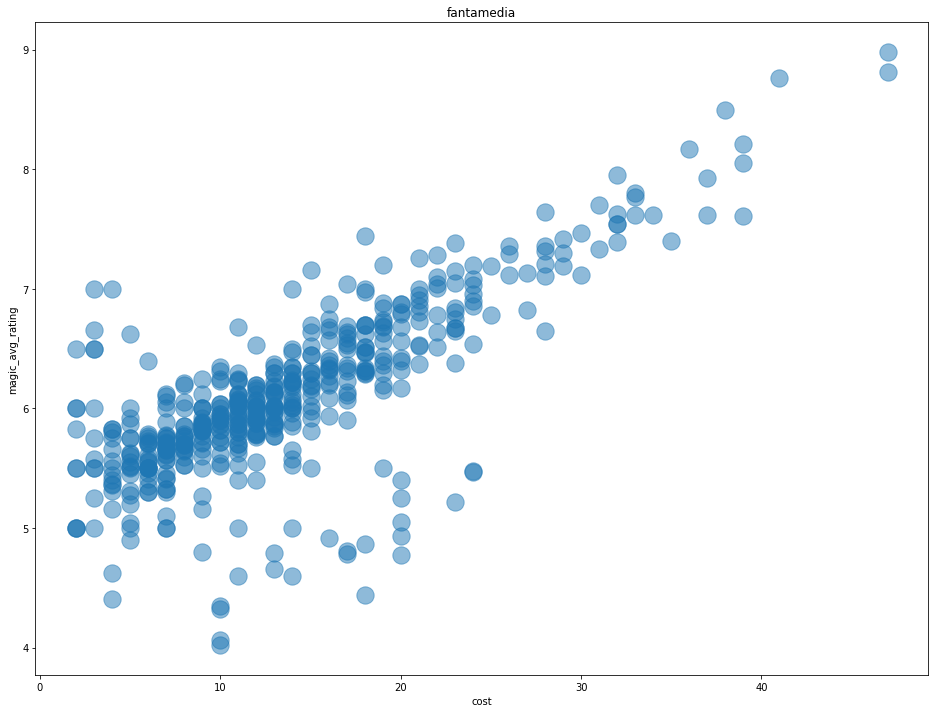

In [9]:
#analisi della fantamedia in relazione al costo dei giocatori all'asta
data_media = data[['cost', 'avg_rating', 'magic_avg_rating']]
data_media = data_media[data_media['cost']>1]
data_media = data_media[data_media['avg_rating']>4]
data_media = data_media[data_media['magic_avg_rating']>4]
data_media.plot(kind='scatter', x='cost', y='avg_rating', figsize=(16,12), s=300, alpha=0.5, title='media voto')
data_media.plot(kind='scatter', x='cost', y='magic_avg_rating', figsize=(16,12), s=300, alpha=0.5, title='fantamedia')

Dai grafici precedenti possiamo notare che la crescita della media e della fantamedia è abbastanza lineare rispetto alla crescita del costo di acquisto del giocatore, ciò significa che i giocatori da cui ci si aspetta di più, ovvero per cui si spendono più crediti, sono quasi sempre quelli che rendono effettivamente di più, sopratutto per quanto riguarda la fantamedia.
La strategia migliore sembrerebbe quindi quella di puntare sui giocatori "classici", in quanto essi sembrano essere in grado di confermare le aspettative.

Nonostante questo è possibile notare anche dei valori fuori scala, specialmente nella zona fra 1 e 10 crediti, che indicano giocatori riportanti una media o una fantamedia molto più alta degli altri nella stessa fascia di prezzo.
Questo suggerisce che possa valere la pena provare a puntare su qualche giocatore scommessa che potrebbe portare ottimi risultati.

In [10]:
#classifica top 10 goleador
data_top = data[['name','goals','club','position']]
top_10_goals = data_top.nlargest(10, columns='goals')
top_10_goals 

,name,goals,club,position
469,Ronaldo C.,29.0,juventus,FW
206,Lukaku R.,24.0,inter,FW
136,Muriel L.,22.0,atalanta,FW
264,Vlahovic D.,21.0,fiorentina,FW
155,Immobile C.,20.0,lazio,FW
553,Simy -.,20.0,crotone,FW
234,Insigne L.,19.0,napoli,T
126,Berardi D.,17.0,sassuolo,T
545,Martinez L.,17.0,inter,FW
348,Joao Pedro G.,16.0,cagliari,T


In [11]:
#top 10 giocatori per goals_per_match
data_top_1 = data[['name','goals_per_match','club','position']]
top_10_goals_per_match = data_top_1.nlargest(10, columns='goals_per_match')
top_10_goals_per_match

,name,goals_per_match,club,position
469,Ronaldo C.,0.878788,juventus,FW
324,Ibrahimovic Z.,0.833333,milan,FW
136,Muriel L.,0.687500,atalanta,FW
206,Lukaku R.,0.685714,inter,FW
264,Vlahovic D.,0.583333,fiorentina,FW
155,Immobile C.,0.571429,lazio,FW
126,Berardi D.,0.566667,sassuolo,T
234,Insigne L.,0.558824,napoli,T
553,Simy -.,0.540541,crotone,FW
466,Caputo F.,0.458333,sassuolo,FW


In [12]:
#top 10 giocatori per goals senza rigori
data_top_2 = data[['name','goals_without_penalty','club','position']]
top_10_goals_no_penalty = data_top_2.nlargest(10, columns='goals_without_penalty')
top_10_goals_no_penalty

,name,goals_without_penalty,club,position
469,Ronaldo C.,23.0,juventus,FW
136,Muriel L.,20.0,atalanta,FW
206,Lukaku R.,18.0,inter,FW
155,Immobile C.,16.0,lazio,FW
264,Vlahovic D.,15.0,fiorentina,FW
545,Martinez L.,15.0,inter,FW
508,Zapata D.,14.0,atalanta,FW
234,Insigne L.,12.0,napoli,T
324,Ibrahimovic Z.,12.0,milan,FW
348,Joao Pedro G.,12.0,cagliari,T


<AxesSubplot:title={'center':'Goals senza rigori'}, xlabel='name'>

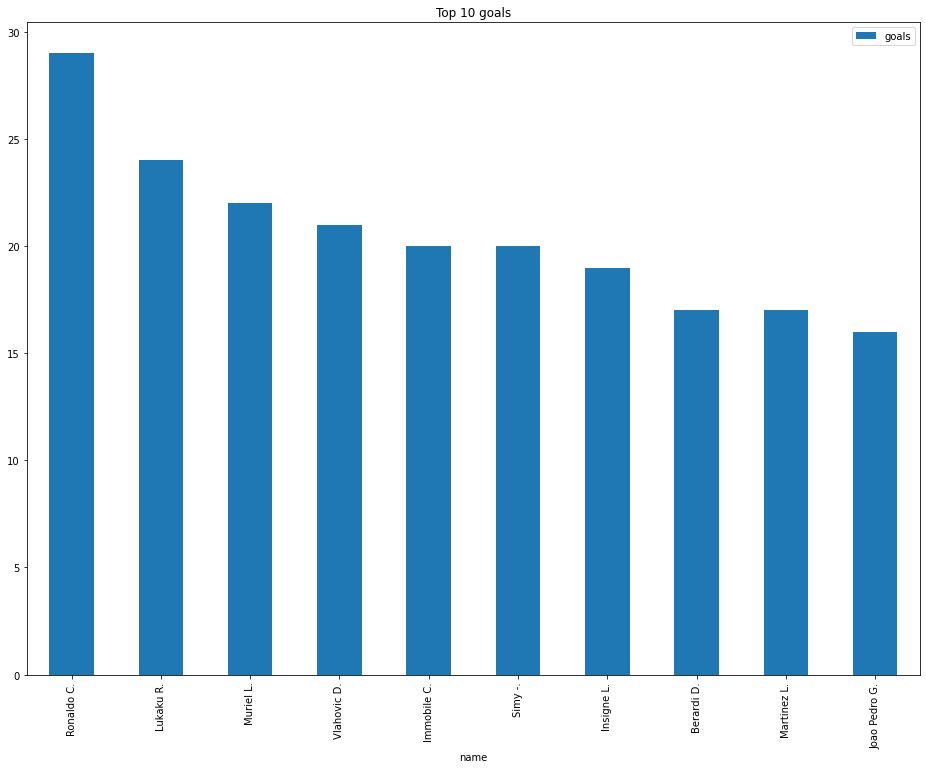

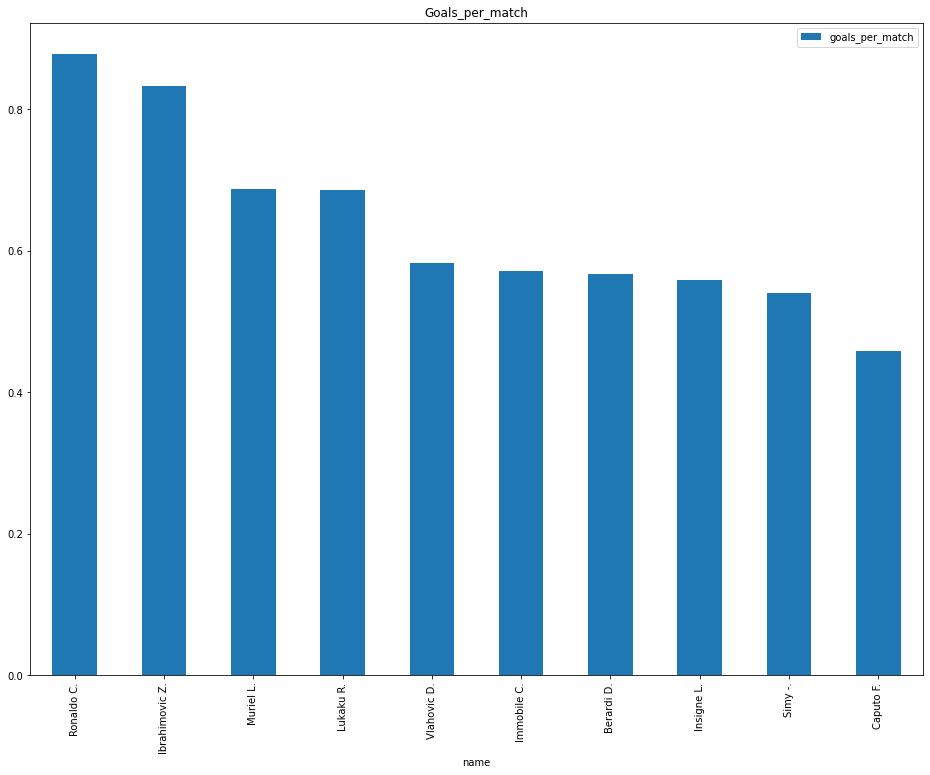

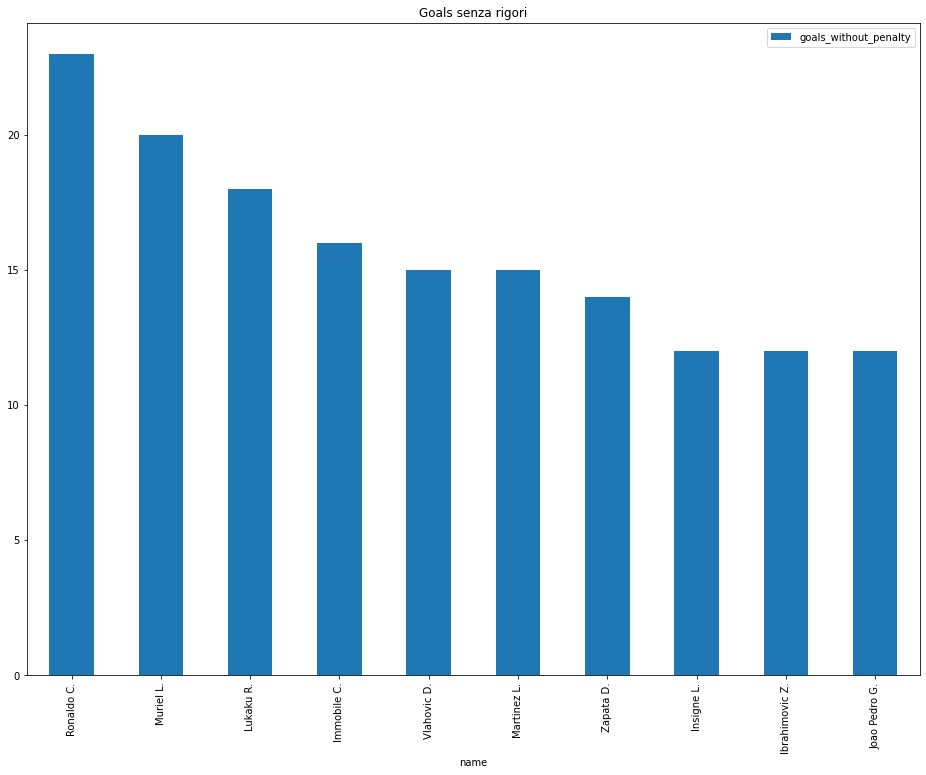

In [13]:
top_10_goals_min = top_10_goals[['name','goals']]
top_10_goals_per_match_min = top_10_goals_per_match[['name','goals_per_match']]
top_10_goals_no_penalty_min = top_10_goals_no_penalty[['name','goals_without_penalty']]
top_10_goals_min.plot(kind='bar', x='name', y='goals', figsize=(16,12), title='Top 10 goals')
top_10_goals_per_match_min.plot(kind='bar', x='name', y='goals_per_match', figsize=(16,12), title='Goals_per_match')
top_10_goals_no_penalty_min.plot(kind='bar', x='name', y='goals_without_penalty', figsize=(16,12), title='Goals senza rigori')


In [14]:
#classifica top 10 assistman
data_top_assist = data[['name','assists','club','position']]
top_10_assist = data_top_assist.nlargest(10, columns='assists')
top_10_assist 

,name,assists,club,position
275,Malinovskiy R.,11.0,atalanta,T
206,Lukaku R.,10.0,inter,FW
391,Mkhitaryan H.,10.0,roma,T
46,Cuadrado J.,9.0,juventus,DF
97,Ilicic J.,9.0,atalanta,T
460,Calhanoglu H.,9.0,milan,T
291,Barrow M.,8.0,bologna,FW
296,Hakimi A.,8.0,inter,DF
299,Zielinski P.,8.0,napoli,MF
549,Milinkovic S.,8.0,lazio,MF


In [15]:
#classifica top 10 assist per match
data_top_assist_1 = data[['name','assist_per_match','club','position']]
top_10_assist_per_match = data_top_assist_1.nlargest(10, columns='assist_per_match')
top_10_assist_per_match 

,name,assist_per_match,club,position
52,Oddei B.,1.000000,sassuolo,T
167,Santander F.,0.500000,bologna,FW
275,Malinovskiy R.,0.343750,atalanta,T
21,Rafael A.,0.333333,spezia,GK
362,Pastina C.,0.333333,benevento,DF
97,Ilicic J.,0.321429,atalanta,T
46,Cuadrado J.,0.310345,juventus,DF
391,Mkhitaryan H.,0.294118,roma,T
98,Bastoni S.,0.285714,spezia,DF
206,Lukaku R.,0.285714,inter,FW


<AxesSubplot:title={'center':'Assist_per_match'}, xlabel='name'>

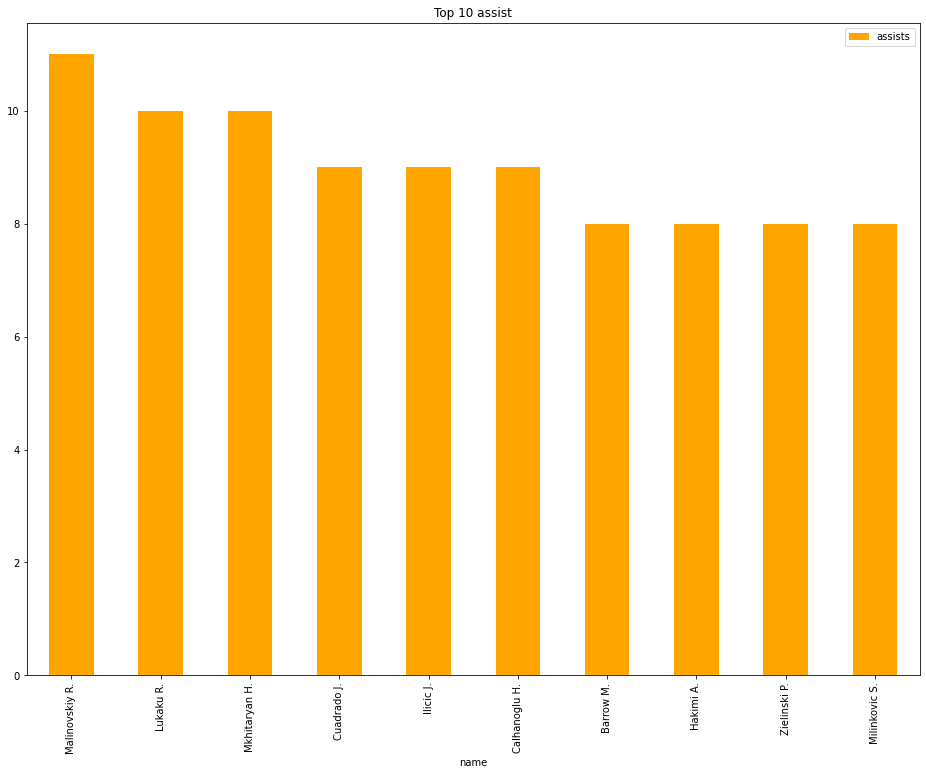

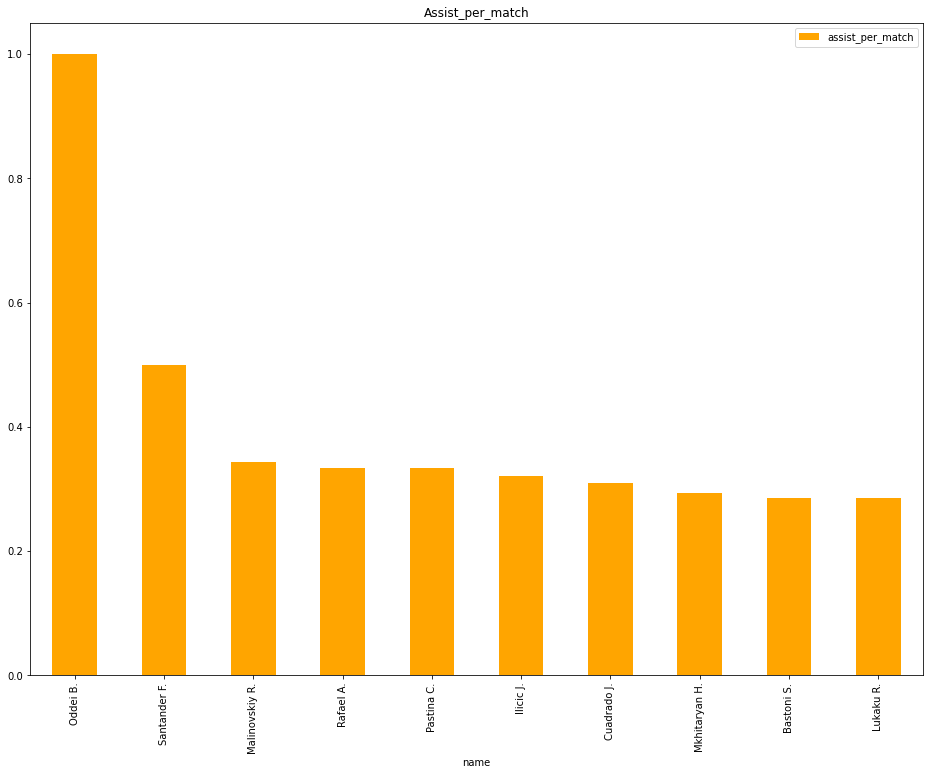

In [16]:
top_10_assist_min = top_10_assist[['name','assists']]
top_10_assist_per_match_min = top_10_assist_per_match[['name','assist_per_match']]
top_10_assist_min.plot(kind='bar', x='name', y='assists', figsize=(16,12), title='Top 10 assist', color = 'orange')
top_10_assist_per_match_min.plot(kind='bar', x='name', y='assist_per_match', figsize=(16,12), title='Assist_per_match', color = 'orange')

